<a href="https://colab.research.google.com/github/AdithiyaG/Langchain/blob/main/Langgraph/02_Intro_to_Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> 30 April 2024






# [Intro to Langgraph](https://langchain-ai.github.io/langgraph/tutorials/introduction/)


In [2]:
pip install -qU langgraph langsmith langchain langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00


In [56]:
import os
from google.colab import userdata
os.environ["AZURE_OPENAI_API_KEY"]=userdata.get('OPENAI_API_KEY')
os.environ["AZURE_OPENAI_ENDPOINT"]=userdata.get('OPENAI_ENDPOINT')
os.environ["OPENAI_API_VERSION"]="2024-02-15-preview"
os.environ["LANGSMITH_API_KEY"]=userdata.get('LANGSMITH_API_KEY')
os.environ["LANGCHAIN_PROJECT"] = "Learning"
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')
from langchain_openai import AzureChatOpenAI

# Set the model as ChatOpenAI
model = AzureChatOpenAI(temperature=0,azure_deployment="gpt-4-32k")

In [55]:
os.environ["LANGCHAIN_TRACING_V2"] = "false"

## Part 1: Build a Basic Chatbot

In [39]:
from typing import Annotated,TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

class State(TypedDict):
  messages:Annotated[list,add_messages]



In [44]:
graph_builder=StateGraph(State)

The add_messages function in our State will append the llm's response messages to whatever messages are already in the state.

In [41]:
def chatbot(state:State):
  input=state["messages"]
  response=model.invoke(input)
  return {"messages":[response]}

In [45]:
graph_builder.add_node("chatbot",chatbot)

In [46]:
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

In [47]:
graph = graph_builder.compile()

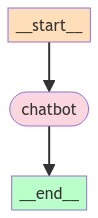

In [48]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except:
    # This requires some extra dependencies and is optional
    pass

In [52]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    event=graph.invoke({"messages": ("user", user_input)})
    print(event)

User: hi
{'messages': [HumanMessage(content='hi', id='55d1ea62-2278-4ed7-854a-b2eee9404e34'), AIMessage(content='Hello! How can I assist you today?', response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17}, 'model_name': 'gpt-4-32k', 'system_fingerprint': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='run-6956603b-d7de-4c48-aaa0-382c7b9cceeb-0')]}
User: q
Goodbye!


Streaming

In [53]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        print(event)

User: Hi
{'chatbot': {'messages': [AIMessage(content='Hello! How can I assist you today?', response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17}, 'model_name': 'gpt-4-32k', 'system_fingerprint': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='run-ab1179b1-94df-4af4-a524-b895a00fd204-0')]}}
User: q
Goodbye!


## Part 2: Enhancing the Chatbot with Tools

In [57]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://langchain-ai.github.io/langgraph/how-tos/async/',
  'content': 'In langgraph, a node can be either a function or a runnable . There are two main nodes we need for this: The agent: responsible for deciding what (if any) actions to take. A function to invoke tools: if the agent decides to take an action, this node will then execute that action. We will also need to define some edges.'},
 {'url': 'https://python.langchain.com/docs/langgraph/',
  'content': 'In langgraph, a node can be either a function or a runnable. There are two main nodes we need for this: The agent: responsible for deciding what (if any) actions to take. A function to invoke tools: if the agent decides to take an action, this node will then execute that action.'}]

In [58]:
from typing import Annotated, Union

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict
from langgraph.prebuilt import tools_condition
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = model
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("action", tool_node)



**`Conditional Edges`** \
Recall that edges route the control flow from one node to the next. Conditional edges usually contain "if" statements to route to different nodes depending on the current graph state. These functions receive the current graph state and return a string or list of strings indicating which node(s) to call next.

In [59]:
tools_condition

<function langgraph.prebuilt.tool_node.tools_condition(state: Union[list[Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]], dict[str, Any]]) -> Literal['action', '__end__']>

**`Conditional Edges`** \
These functions receive the current graph state and return a string or list of strings indicating which node(s) to call next.

In [61]:
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
    {"action": "action", "__end__": "__end__"},
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("action", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()

The prebuilt tools_condition returns the "__end__" string if no tool calls are made. When the graph transitions to __end__, it has no more tasks to complete and ceases execution. Because the condition can return __end__, we don't need to explicitly set a finish_point this time. Our graph already has a way to finish!

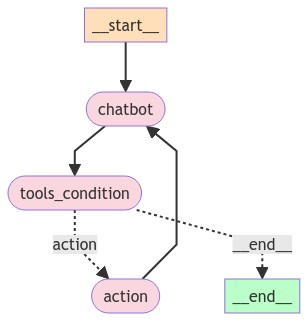

In [62]:
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except:
    # This requires some extra dependencies and is optional
    pass

In [63]:
from langchain_core.messages import BaseMessage

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            if isinstance(value["messages"][-1], BaseMessage):
                print("Assistant:", value["messages"][-1].content)

User: hi
Assistant: Hello! How can I assist you today?
User: q
Goodbye!
